In [75]:
import pandas as pd

# Load the Titanic dataset
df= pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [77]:
df['Survived'].value_counts()

# 0 means Survived
# 1 means  Not-Survived

Survived
0    549
1    342
Name: count, dtype: int64

In [78]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

# Cleaning dataset

In [80]:
df=df.drop(columns=['Name', 'Ticket', 'Cabin'], axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [81]:
df["Age"]= df["Age"].fillna(df["Age"].mean())

In [82]:
df['Embarked']=df['Embarked'].ffill()

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [84]:
from sklearn.preprocessing import LabelEncoder

labelencode= LabelEncoder()
df['Sex']=labelencode.fit_transform(df['Sex'])
df['Embarked']=labelencode.fit_transform(df['Embarked'])

# analyzing dataset

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

## histplot

In [ ]:
fig, axes= plt.subplots(3,3, figsize=((22,20)) )

for i,ax in enumerate(axes.flatten()):
    if i>=len(df.columns)-1:
        break
    sns.histplot(data=df, x=df[df.columns[i]], hue=df.Survived, ax=ax, bins =70, kde=True)
    ax.set_title(f"histogram of {df.columns[i]} wrt Survived")
    ax.grid(True)

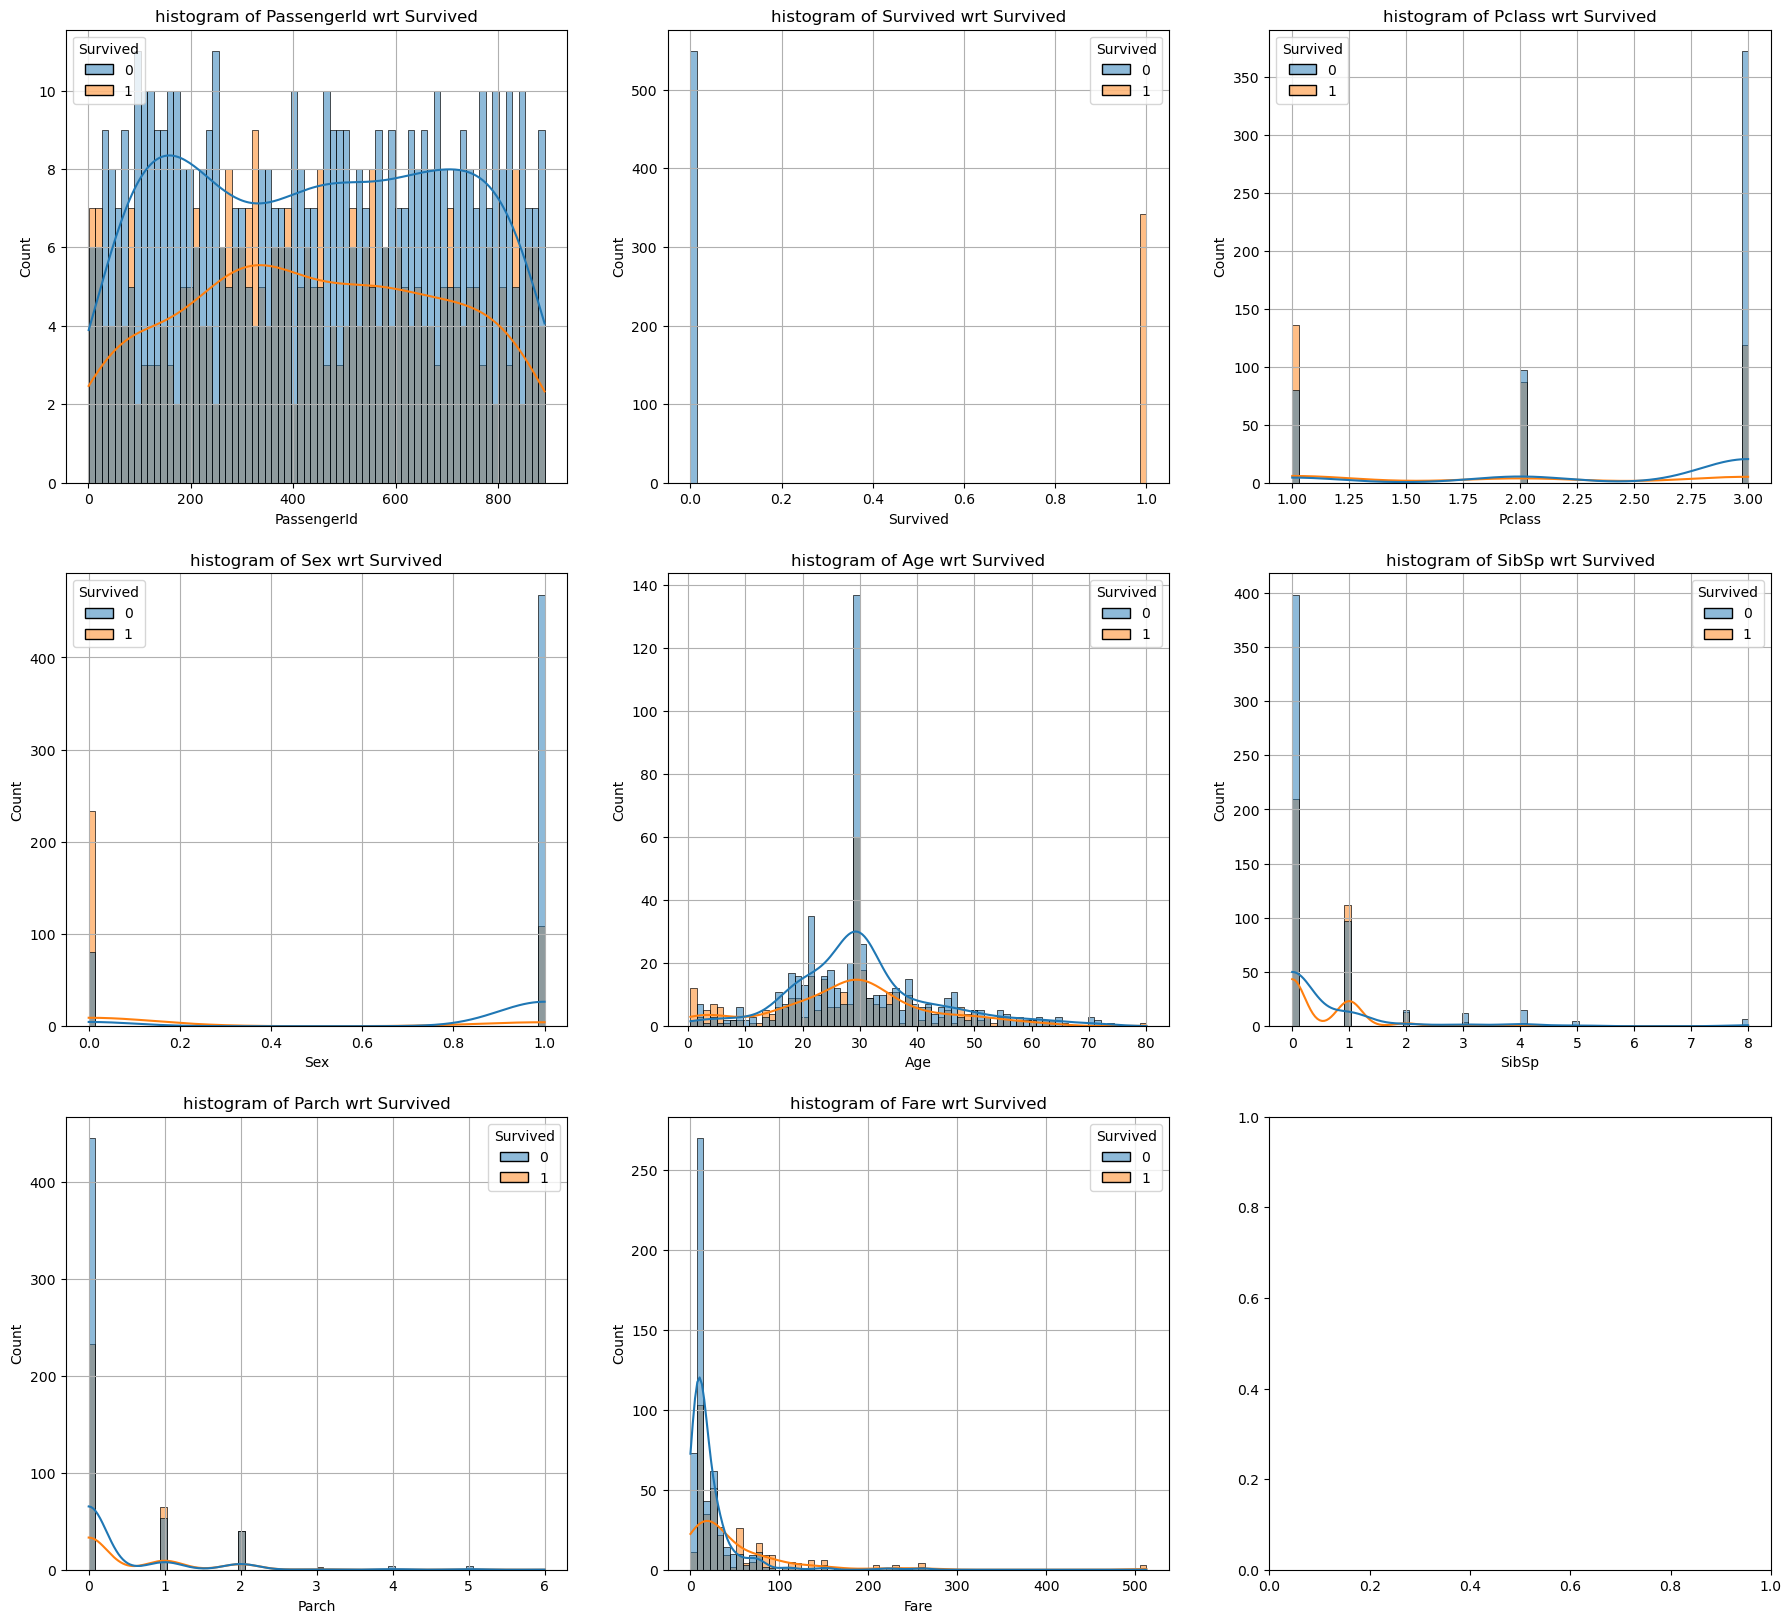

## Piecharts

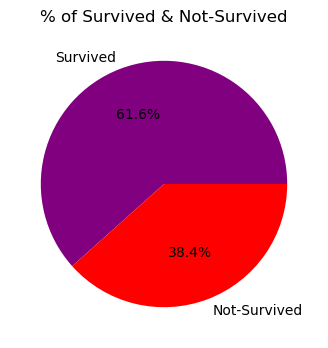

In [90]:
Survived= df["Survived"].value_counts()

figue= plt.figure(figsize=(6,4) )
plt.pie(Survived, labels=['Survived', 'Not-Survived'], colors= ['purple', 'red'], autopct="%1.1f%%")
plt.title("% of Survived & Not-Survived")
plt.show()

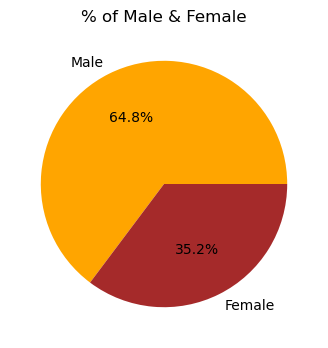

In [91]:
sex= df['Sex'].value_counts()
Survived= df["Survived"].value_counts()

figure= plt.figure(figsize=(6,4))
labels=['Male', 'Female']
plt.pie(sex, labels=labels, colors= ['orange', 'brown'], autopct="%1.1f%%")
plt.title("% of Male & Female")
plt.show()

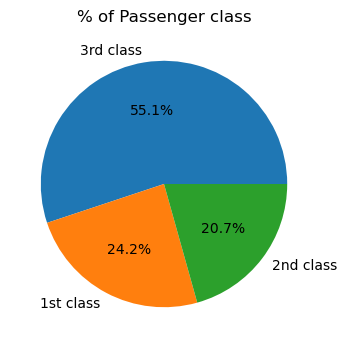

In [92]:
pclass= df['Pclass'].value_counts()
Survived= df["Survived"].value_counts()

figure= plt.figure(figsize=(6,4))

plt.pie(pclass, labels=['3rd class', '1st class', '2nd class'], autopct="%1.1f%%")
plt.title("% of Passenger class")
plt.show()

## Correlation table

<Axes: >

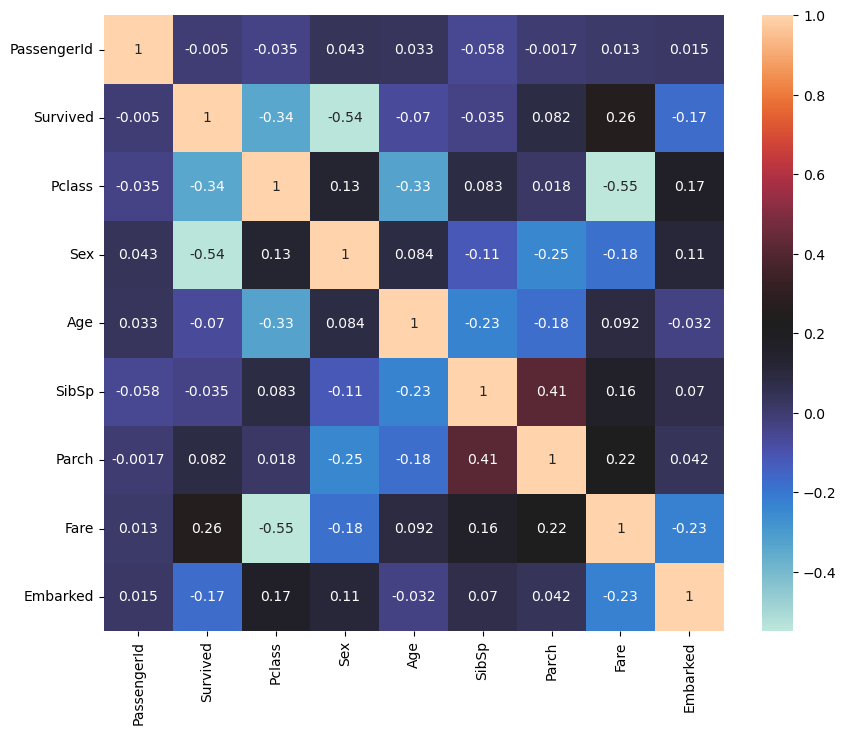

In [94]:

figure= plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="icefire")

## feature importance

In [96]:
X= df.loc[: , df.columns != "Survived"]
Y= df["Survived"]

In [97]:
from sklearn.ensemble import ExtraTreesClassifier

ETC= ExtraTreesClassifier()
ETC.fit(X, Y)

ExtraTreesClassifier()

<Axes: >

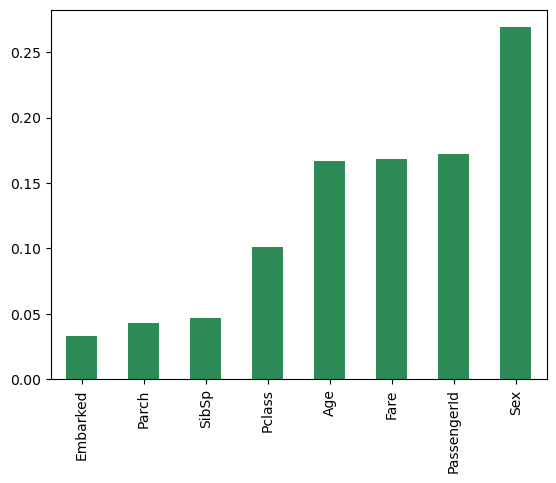

In [98]:
feature_importance= pd.Series(ETC.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='bar', color='seagreen')

## splitting the dataset

In [100]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

x= df.loc[: , df.columns != "Survived"]
y= df["Survived"]

x_train, x_test, y_train, y_test= train_test_split( x ,y, test_size= 0.3)

### Applying SMOTE to handle imbalanced datasets

In [102]:

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print(f"Original dataset size: {x_train.shape}")
print(f"Resampled dataset size: {x_train_resampled.shape}")


Original dataset size: (623, 8)
Resampled dataset size: (754, 8)


In [103]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()

## Hyperparameter Tunning

In [105]:
from sklearn.model_selection import GridSearchCV

parameter_grid= {
    'max_depth':[None, 10, 20, 30],
    'n_estimators':[ 50, 100, 150, 200],
    'min_samples_split': [ 2, 5, 10, 15]    
}

grid_search= GridSearchCV(model, parameter_grid, cv=5, scoring= 'accuracy')
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 15, 'n_estimators': 50}


## Building model

In [107]:
model= RandomForestClassifier( max_depth=10, min_samples_split= 5, n_estimators= 50)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50)

In [108]:
train_accuracy= model.score(x_train, y_train)
print(f"Train Accuracy: {round(train_accuracy *100, 1)}%")

test_accuracy= model.score(x_test, y_test)
print(f"Test Accuracy: {round(test_accuracy *100, 1)}%")

Train Accuracy: 93.3%
Test Accuracy: 84.0%


In [109]:
prediction= model.predict(x_test)

## Precision_score, F1_score, Recall_score

In [111]:
from sklearn.metrics import precision_score,f1_score, recall_score

# precision
y_pred_adjusted = (model.predict_proba(x_test)[:, 1] > 0.4).astype(int)
precision = precision_score(y_test, prediction, average='binary')  # For binary classification
print(f"Precision: {precision:.2f}")

# Recall_score
recall= recall_score(y_test, prediction)
print(f"recall_score: {recall:.2f}")

# f1_score
f1= f1_score(y_test, prediction)
print(f"f1_score: {f1:.2f}")

Precision: 0.80
recall_score: 0.74
f1_score: 0.77


## Prediction

In [113]:
new_prediction = pd.DataFrame([[96, 3, 1, 13, 0, 1, 180, 3]], columns=['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])
pred= model.predict(new_prediction)
pred

array([0], dtype=int64)

## New data

In [166]:
new_test_dataset= pd.read_excel("Titanic_Test_Data.xlsx")


In [168]:
Survived= model.predict(new_test_dataset)
new_test_dataset['Survived']= Survived
Survived

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1], dtype=int64)

In [184]:
new_test_dataset.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,34,2,0,56,0,1,200,0,1
1,5,3,0,45,0,5,100,2,0
2,3,1,0,13,0,2,210,1,1
3,5,2,1,12,0,6,530,2,1
4,34,2,0,19,1,3,100,1,1


In [186]:
new_test_dataset.to_excel("Titanic-Test-Data-Result.xlsx")